In [1]:
# LOADING MODULES

import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import datasets, linear_model
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import xgboost as xgb

#pd.options.mode.chained_assignment = None
#pd.options.display.max_columns = 999

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

from pydoc import help
from scipy.stats.stats import pearsonr

from datetime import datetime
from datetime import timedelta
import datetime as dt
import calendar

import math

/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning:

Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.



In [ ]:
#DELETE
train_df = pd.read_csv("./processed_train.csv")
test_df = pd.read_csv("./processed_test.csv")

In [ ]:
#DELETE
print (train_df.columns)
print (train_df.dtypes)

In [ ]:
# EXTRACTING FEATURES FROM THE WEATHER DATASET

external=pd.read_csv("./external_data2.csv")

In [ ]:
print (external.columns)
external.columns = ['Index', 'geoNetwork_country', 'InternetUsers', 'Population', 'NonUsers']
print (external.columns)

In [ ]:
# MERGING EXISTING DATA WITH WEATHER DATA TO GENERATE NEW FEATURES

train_new = pd.merge(train_df, external, how='left', on=['geoNetwork_country'])

print (train_new.columns)

In [ ]:
print (train_new.shape)
print (train_new.columns)
print (train_new.dtypes)

In [ ]:
print (train_new.geoNetwork_country.unique())
#print (train_new.geoNetwork_country.size)

In [ ]:
print (train_df.geoNetwork_country.unique())


In [74]:
# LOAD DATA

initial_train = pd.read_csv("./train.csv")
initial_test = pd.read_csv("./test.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
print (initial_train.shape)
print (initial_test.shape)

print (initial_train.columns)
print (initial_test.columns)

print (initial_train.dtypes)

In [2]:
# FUNCTION TO EXTRACT JSON VALUES

def load_df(filename):
    csv_path = "./" + filename
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}
                    )
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    return df

In [3]:
train_df = load_df("train.csv")
test_df = load_df("test.csv")

In [ ]:
train_full_df = train_df
test_ful_df = test_df

In [ ]:
print ("TRAIN")
print (train_df.shape)
print (train_df.columns)
print (train_df.dtypes)

print ("TEST")
print (test_df.shape)
print (test_df.columns)
print (test_df.dtypes)

In [ ]:
train_df.device_browser.unique()

In [ ]:
train_df.device_browserSize.unique()

In [ ]:
train_df.device_browserVersion.unique()

In [ ]:
train_df.device_deviceCategory.unique()

In [ ]:
train_df.device_flashVersion.unique()

In [ ]:
train_df.device_isMobile.unique()

In [ ]:
train_df.device_language.unique()

In [ ]:
train_df.device_mobileDeviceBranding.unique()

In [ ]:
train_df.device_mobileDeviceInfo.unique()

In [ ]:
train_df.device_mobileDeviceMarketingName.unique()

In [ ]:
train_df.device_mobileDeviceModel.unique()

In [ ]:
train_df.device_mobileInputSelector.unique()

In [ ]:
train_df.device_operatingSystem.unique()

In [ ]:
train_df.device_operatingSystemVersion.unique()

In [ ]:
train_df.device_screenColors.unique()

In [ ]:
train_df.device_screenResolution.unique()

In [ ]:
train_df.geoNetwork_city.unique()

In [ ]:
train_df.geoNetwork_cityId.unique()

In [ ]:
train_df.geoNetwork_continent.unique()

In [ ]:
train_df.geoNetwork_country.unique()

In [ ]:
train_df.geoNetwork_latitude.unique()

In [ ]:
train_df.geoNetwork_longitude.unique()

In [ ]:
train_df.geoNetwork_metro.unique()

In [ ]:
train_df.geoNetwork_networkDomain.unique()

In [ ]:
train_df.geoNetwork_networkLocation.unique()

In [ ]:
train_df.geoNetwork_region.unique()

In [ ]:
train_df.geoNetwork_subContinent.unique()

In [ ]:
train_df.totals_bounces.unique()

In [ ]:
train_df.totals_hits.unique()

In [ ]:
train_df.totals_newVisits.unique()

In [ ]:
train_df.totals_pageviews.unique()

In [ ]:
train_df.totals_visits.unique()

In [ ]:
train_df.trafficSource_adContent.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo.adNetworkType.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo_criteriaParameters.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo_gclId.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo_isVideoAd.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo_page.unique()

In [ ]:
train_df.trafficSource_adwordsClickInfo_slot.unique()

In [ ]:
train_df.trafficSource_campaign.unique()

In [ ]:
train_df.trafficSource_isTrueDirect.unique()

In [ ]:
train_df.trafficSource_keyword.unique()

In [ ]:
train_df.trafficSource_medium.unique()

In [ ]:
train_df.trafficSource_referralPath.unique()

In [ ]:
train_df.trafficSource_source.unique()

In [4]:
# CONVERTING TRANSACTION REVENUE TO FLOAT

train_df["totals_transactionRevenue"] = train_df["totals_transactionRevenue"].astype('float')

In [ ]:
nzi = pd.notnull(train_df["totals_transactionRevenue"]).sum()
nzr = (gdf["totals_transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

In [ ]:
print("Number of unique visitors in train set : ",train_df.fullVisitorId.nunique(), " out of rows : ",train_df.shape[0])
print("Number of unique visitors in test set : ",test_df.fullVisitorId.nunique(), " out of rows : ",test_df.shape[0])
print("Number of common visitors in train and test set : ",len(set(train_df.fullVisitorId.unique()).intersection(set(test_df.fullVisitorId.unique())) ))

In [ ]:
#VERIFY
gdf = train_df.groupby("fullVisitorId")["totals_transactionRevenue"].sum().reset_index()
print (gdf.columns)

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals_transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [ ]:
#VERIFY
plt.figure(figsize=(8,6))
sns.distplot(np.log1p(non_zero))
plt.title("Log Distribution of Non Zero Total Transactions");
plt.xlabel("Log - Total Transactions");

In [ ]:
# DEVICE ATTRIBUTES

In [13]:
fig1 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Device Category", "Non-zero Revenue Count: Device Category"], print_grid=False)

trs1 = []

tmp1 = train_df.groupby('device_deviceCategory').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp1 = tmp1.dropna().sort_values("Count", ascending = False)
tr1 = go.Bar(y = tmp1["Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['device_deviceCategory'])
trs1.append(tr1)

tmp1 = train_df.groupby('device_deviceCategory').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp1 = tmp1.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr1 = go.Bar(y = tmp1["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['device_deviceCategory'])
trs1.append(tr1)

fig1.append_trace(trs1[0], 1, 1)
fig1.append_trace(trs1[1], 1, 2)
fig1['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig1)

fig2 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Device OperatingSystem", "Non-zero Revenue Count: Device OperatingSystem"], print_grid=False)

trs2 = []

tmp2 = train_df.groupby('device_operatingSystem').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp2 = tmp2.dropna().sort_values("Count", ascending = False)
tr2 = go.Bar(y = tmp2["Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['device_operatingSystem'])
trs2.append(tr2)

tmp2 = train_df.groupby('device_operatingSystem').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp2 = tmp2.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr2 = go.Bar(y = tmp2["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['device_operatingSystem'])
trs2.append(tr2)

fig2.append_trace(trs2[0], 1, 1)
fig2.append_trace(trs2[1], 1, 2)
fig2['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig2)

In [11]:
#GEOGRAPHY ATTRIBUTES

fig1 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Continent", "Non-zero Revenue Count: Continent"], print_grid=False)

trs1 = []

tmp1 = train_df.groupby('geoNetwork_continent').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp1 = tmp1.dropna().sort_values("Count", ascending = False)
tr1 = go.Bar(y = tmp1["Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['geoNetwork_continent'])
trs1.append(tr1)

tmp1 = train_df.groupby('geoNetwork_continent').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp1 = tmp1.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr1 = go.Bar(y = tmp1["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['geoNetwork_continent'])
trs1.append(tr1)

fig1.append_trace(trs1[0], 1, 1)
fig1.append_trace(trs1[1], 1, 2)
fig1['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig1)

fig2 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: SubContinent", "Non-zero Revenue Count: SubContinent"], print_grid=False)

trs2 = []

tmp2 = train_df.groupby('geoNetwork_subContinent').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp2 = tmp2.dropna().sort_values("Count", ascending = False)
tr2 = go.Bar(y = tmp2["Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['geoNetwork_subContinent'])
trs2.append(tr2)

tmp2 = train_df.groupby('geoNetwork_subContinent').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp2 = tmp2.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr2 = go.Bar(y = tmp2["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['geoNetwork_subContinent'])
trs2.append(tr2)

fig2.append_trace(trs2[0], 1, 1)
fig2.append_trace(trs2[1], 1, 2)
fig2['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig2)

In [16]:
def date_parser(df):
    df['date'] = pd.to_datetime(df['date'].astype(str))
    df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit = 's')
    return df

train_df = date_parser(train_df)
test_df = date_parser(test_df)

def add_time_features(df):
    df['dayofweek'] = df['visitStartTime'].dt.dayofweek
    df['hour'] = df['visitStartTime'].dt.hour
    df['month'] = df['visitStartTime'].dt.month
    df[['dayofweek','hour','month']] = df[['dayofweek','hour','month']].apply(lambda x : x.astype('float') )
    return df

train_df = add_time_features(train_df)
test_df = add_time_features(test_df)

In [23]:
#DATE ATTRIBUTES

fig1 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Hour", "Non-zero Revenue Count: Hour"], print_grid=False)

trs1 = []

tmp1 = train_df.groupby('hour').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp1 = tmp1.dropna().sort_values("Count", ascending = False)
tr1 = go.Bar(y = tmp1["Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['hour'])
trs1.append(tr1)

tmp1 = train_df.groupby('hour').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp1 = tmp1.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr1 = go.Bar(y = tmp1["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="blue"), x= tmp1['hour'])
trs1.append(tr1)

fig1.append_trace(trs1[0], 1, 1)
fig1.append_trace(trs1[1], 1, 2)
fig1['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig1)

fig2 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Day of Week", "Non-zero Revenue Count: Day of Week"], print_grid=False)

trs2 = []

tmp2 = train_df.groupby('dayofweek').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp2 = tmp2.dropna().sort_values("Count", ascending = False)
tr2 = go.Bar(y = tmp2["Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['dayofweek'])
trs2.append(tr2)

tmp2 = train_df.groupby('dayofweek').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp2 = tmp2.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr2 = go.Bar(y = tmp2["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="orange"), x= tmp2['dayofweek'])
trs2.append(tr2)

fig2.append_trace(trs2[0], 1, 1)
fig2.append_trace(trs2[1], 1, 2)
fig2['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig2)

fig3 = tools.make_subplots(rows=1, cols=2, subplot_titles=["Count: Month", "Non-zero Revenue Count: Month"], print_grid=False)

trs3 = []

tmp3 = train_df.groupby('month').agg({"totals_transactionRevenue": "size"}).reset_index().rename(columns={"totals_transactionRevenue" : "Count"})
tmp3 = tmp3.dropna().sort_values("Count", ascending = False)
tr3 = go.Bar(y = tmp3["Count"], orientation="v", marker=dict(opacity=0.5, color="cyan"), x= tmp3['month'])
trs3.append(tr3)

tmp3 = train_df.groupby('month').agg({"totals_transactionRevenue": "count"}).reset_index().rename(columns={"totals_transactionRevenue" : "Non-zero Revenue Count"})
tmp3 = tmp3.dropna().sort_values("Non-zero Revenue Count", ascending = False)
tr3 = go.Bar(y = tmp3["Non-zero Revenue Count"], orientation="v", marker=dict(opacity=0.5, color="cyan"), x= tmp3['month'])
trs3.append(tr3)

fig3.append_trace(trs3[0], 1, 1)
fig3.append_trace(trs3[1], 1, 2)
fig3['layout'].update(height=450, margin=dict(b=200), showlegend=False)
py.iplot(fig3)

In [69]:
tmp = train_df["channelGrouping"].value_counts()
colors = ["#8d44fc", "#ed95d5", "#caadf7", "#6161b7", "#7e7eba", "#babad1"]
trace = go.Pie(labels=tmp.index, values=tmp.values, marker=dict(colors=colors))
layout = go.Layout(title="Channel Grouping", height=400)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename='basic_pie_chart')

In [24]:
# Probability

cnt_srs1 = train_df.groupby('fullVisitorId')['totals_transactionRevenue'].agg(['size', 'count', 'mean'])
cnt_srs1.columns = ["count", "count of non-zero revenue", "mean"]
cnt_srs1 = cnt_srs1.sort_values(by="count", ascending=False)

In [25]:
print (cnt_srs1.shape)
print (cnt_srs1.min())
print (cnt_srs1.max())

(714167, 3)
count                            1.0
count of non-zero revenue        0.0
mean                         10000.0
dtype: float64
count                        2.780000e+02
count of non-zero revenue    3.300000e+01
mean                         1.602375e+10
dtype: float64


In [26]:
prob1 = cnt_srs1
prob1.shape

(714167, 3)

In [27]:
prob1["probability"] = cnt_srs1['count of non-zero revenue']/cnt_srs1['count']
#prob["count"] = cnt_srs['count']
#prob["count of non-zero revenue"] = cnt_srs['count of non-zero revenue']

In [28]:
print (prob1.shape)
print (prob1.columns)
print (prob1.head(10))

(714167, 4)
Index(['count', 'count of non-zero revenue', 'mean', 'probability'], dtype='object')
                     count  count of non-zero revenue          mean  \
fullVisitorId                                                         
1957458976293878100    278                         16  4.819589e+09   
0824839726118485274    255                          0           NaN   
3608475193341679870    201                          1  2.348000e+07   
1856749147915772585    199                          0           NaN   
3269834865385146569    155                          1  1.799000e+08   
0720311197761340948    153                          0           NaN   
7634897085866546110    148                          1  2.500000e+07   
4038076683036146727    138                          0           NaN   
0232377434237234751    135                          1  1.798000e+07   
3694234028523165868    129                          1  1.519000e+07   

                     probability  
fullVisitorId  

In [29]:
prob1 = prob1.sort_values(by="probability", ascending=False)

In [72]:
prob_high = prob1[prob1['count'] > 6]

In [73]:
print (prob_high.shape)
print (prob_high.columns)
print (prob_high.head(10))

(4524, 4)
Index(['count', 'count of non-zero revenue', 'mean', 'probability'], dtype='object')
                     count  count of non-zero revenue          mean  \
fullVisitorId                                                         
0608915197735218105     17                         13  2.335615e+08   
803888563485194008       7                          5  4.990000e+07   
3818637526754889697      7                          5  1.044740e+08   
4984366501121503466     24                         16  5.946188e+08   
3857043812510146001      9                          6  8.878500e+07   
2411322974724385937     11                          7  2.970000e+07   
0777922178356486144     10                          6  5.311667e+07   
8657427332734176422     10                          6  1.259100e+08   
5263059809967138936      7                          4  1.460800e+08   
3033366073043100694      7                          4  1.655350e+08   

                     probability  
fullVisitorId    

In [32]:
print (prob1.shape)
print (prob1.columns)
print (prob1.head(10))

(714167, 4)
Index(['count', 'count of non-zero revenue', 'mean', 'probability'], dtype='object')
                     count  count of non-zero revenue         mean  \
fullVisitorId                                                        
0037806222406366969      1                          1   16990000.0   
9507736163898888702      1                          1   40770000.0   
647109355709882719       1                          1   12990000.0   
3193356620853190867      1                          1   12990000.0   
6298030765010140996      1                          1   27980000.0   
0415608676546432559      1                          1  118980000.0   
1706545499690432606      1                          1   44480000.0   
7647399051164881931      1                          1   86380000.0   
582674888457699636       2                          2   56185000.0   
6997840417339284915      1                          1   24990000.0   

                     probability  
fullVisitorId              

In [ ]:
actual_prob = train_df.groupby('fullVisitorId')['totals_transactionRevenue'].agg(['size', 'count'])

In [ ]:
print (actual_prob.shape)
print (actual_prob.columns)
print (actual_prob.head(10))

In [ ]:
pref_df = pd.DataFrame({"fullVisitorId":train_df["fullVisitorId"].values})
pred_df['transactionRevenue'] = train_df['totals_transactionRevenue'].values
pred_df['count'] = actual_prob['count'] 


In [ ]:
print (pref_df.shape)
print (pref_df.columns)
print (pref_df.head(10))

In [ ]:
train_prob["probability"] = cnt_srs['count of non-zero revenue']/cnt_srs['count']
train_prob["count"] = cnt_srs['count']
train_prob["count of non-zero revenue"] = cnt_srs['count of non-zero revenue']

In [ ]:
train_prob.shape

In [ ]:
train_prob.columns = ["probability", "count of non-zero revenue", "mean"]

In [33]:
print("Variables not in test but in train : ", set(train_df.columns).difference(set(test_df.columns)))

Variables not in test but in train :  {'trafficSource_campaignCode', 'totals_transactionRevenue'}


In [35]:
const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters']

In [36]:
cols_to_drop = const_cols + ['sessionId']

train_df = train_df.drop(cols_to_drop + ["trafficSource_campaignCode"], axis=1)
test_df = test_df.drop(cols_to_drop, axis=1)

In [37]:
print ("TRAIN")
print (train_df.shape)
print (train_df.columns)
print (train_df.dtypes)

print ("TEST")
print (test_df.shape)
print (test_df.columns)
print (test_df.dtypes)

TRAIN
(903653, 37)
Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'dayofweek', 'hour', 'month'],
   

In [39]:
#MAPPING STRING VALUES TO INTEGERS
from sklearn import model_selection, preprocessing, metrics

# Impute 0 for missing target values
train_df["totals_transactionRevenue"].fillna(0, inplace=True)
train_y = train_df["totals_transactionRevenue"].values
train_id = train_df["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device_browser", 
            "device_deviceCategory", "device_operatingSystem", 
            "geoNetwork_city", "geoNetwork_continent", 
            "geoNetwork_country", "geoNetwork_metro",
            "geoNetwork_networkDomain", "geoNetwork_region", 
            "geoNetwork_subContinent", "trafficSource_adContent", 
            "trafficSource_adwordsClickInfo.adNetworkType", 
            "trafficSource_adwordsClickInfo.gclId", 
            "trafficSource_adwordsClickInfo.page", 
            "trafficSource_adwordsClickInfo.slot", "trafficSource_campaign",
            "trafficSource_keyword", "trafficSource_medium", 
            "trafficSource_referralPath", "trafficSource_source",
            'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_isTrueDirect']

for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_df[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_df[col] = lbl.transform(list(train_df[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

channelGrouping
device_browser
device_deviceCategory
device_operatingSystem
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
trafficSource_adContent
trafficSource_adwordsClickInfo.adNetworkType
trafficSource_adwordsClickInfo.gclId
trafficSource_adwordsClickInfo.page
trafficSource_adwordsClickInfo.slot
trafficSource_campaign
trafficSource_keyword
trafficSource_medium
trafficSource_referralPath
trafficSource_source
trafficSource_adwordsClickInfo.isVideoAd
trafficSource_isTrueDirect


In [ ]:
#EXTERNAL DATA FROM STRINGS TO INTEGERS
from sklearn import model_selection, preprocessing, metrics

# Impute 0 for missing target values
train_new["totals_transactionRevenue"].fillna(0, inplace=True)
train_y = train_new["totals_transactionRevenue"].values
train_id = train_new["fullVisitorId"].values
test_id = test_df["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device_browser", 
            "device_deviceCategory", "device_operatingSystem", 
            "geoNetwork_city", "geoNetwork_continent", 
            "geoNetwork_country", "geoNetwork_metro",
            "geoNetwork_networkDomain", "geoNetwork_region", 
            "geoNetwork_subContinent", "trafficSource_adContent", 
            "trafficSource_adwordsClickInfo.adNetworkType", 
            "trafficSource_adwordsClickInfo.gclId", 
            "trafficSource_adwordsClickInfo.page", 
            "trafficSource_adwordsClickInfo.slot", "trafficSource_campaign",
            "trafficSource_keyword", "trafficSource_medium", 
            "trafficSource_referralPath", "trafficSource_source",
            'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_isTrueDirect']

for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(train_new[col].values.astype('str')) + list(test_df[col].values.astype('str')))
    train_new[col] = lbl.transform(list(train_new[col].values.astype('str')))
    test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

In [46]:
#CONVERTING OBJECT TO FLOAT
print (train_df.columns)
num_cols = ["totals_hits", "totals_pageviews", "visitNumber", "totals_bounces",  "totals_newVisits", "dayofweek", "hour", "month"]    

for col in num_cols:
    train_df[col] = train_df[col].astype(float)
    test_df[col] = test_df[col].astype(float)

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'dayofweek', 'hour', 'month'],
      dtype='object')


In [ ]:
#SPLITTING DATA BASED ON DATE
import datetime

# Split the train dataset into development and valid based on time 
dev_df = train_df[train_df['date']<=datetime.date(2017,5,31)]
val_df = train_df[train_df['date']>datetime.date(2017,5,31)]
dev_y = np.log1p(dev_df["totals_transactionRevenue"].values)
val_y = np.log1p(val_df["totals_transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
test_X = test_df[cat_cols + num_cols] 

In [ ]:
print (dev_df.shape)
print (dev_df.columns)

print (val_df.shape)
print (val_df.columns)

print (dev_y.shape)

print (val_y.shape)

print (dev_X.shape)
print (dev_X.columns)

print (val_X.shape)
print (val_X.columns)

print (test_X.shape)
print (test_X.columns)

In [47]:
#SPLITTING DATA AS 75% FOR TRAIN AND 25% FOR VALIDATION 

x, y = train_df.shape
x1 = 3 * int(x / 4)

dev_df = train_df[0:x1]
val_df = train_df[x1:x]

dev_X = dev_df
val_X = val_df

dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
val_y = np.log1p(val_X["totals_transactionRevenue"].values)

dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

test_X = test_df
test_X = test_X.drop(['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

print (dev_y.shape)

print (val_y.shape)

print (dev_X.shape)
print (dev_X.columns)

print (val_X.shape)
print (val_X.columns)

print (test_X.shape)
print (test_X.columns)

(677739,)
(225914,)
(677739, 33)
Index(['channelGrouping', 'visitId', 'visitNumber', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'dayofweek', 'hour', 'month'],
      dtype='object')
(225914, 33)
Index(['channelGrouping', 'visitId', 'vi

In [ ]:
# import sys
# !conda install --yes --prefix {sys.prefix} lightgbm

In [ ]:
# !conda install --yes lightgbm

In [ ]:
# !conda install --yes -c conda-forge lightgbm

In [48]:
print ("TRAIN")
print (train_df.shape)
print (train_df.columns)

print ("TEST")
print (test_df.shape)
print (test_df.columns)

TRAIN
(903653, 37)
Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'geoNetwork_city',
       'geoNetwork_continent', 'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue',
       'trafficSource_adContent',
       'trafficSource_adwordsClickInfo.adNetworkType',
       'trafficSource_adwordsClickInfo.gclId',
       'trafficSource_adwordsClickInfo.isVideoAd',
       'trafficSource_adwordsClickInfo.page',
       'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign',
       'trafficSource_isTrueDirect', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'dayofweek', 'hour', 'month'],
   

In [ ]:
imp_cols = ["channelGrouping", 
            "device_operatingSystem", 
            "geoNetwork_city", "geoNetwork_region",
            "geoNetwork_country", 
            "geoNetwork_metro",
            "geoNetwork_networkDomain", 
            "trafficSource_adwordsClickInfo.gclId", 
            "trafficSource_referralPath", "trafficSource_source",
            "totals_hits", "totals_pageviews", "visitNumber"
            , "visitId"
           ]

dev_X = dev_X[imp_cols] 
val_X = val_X[imp_cols] 
test_X = test_X[imp_cols] 

In [ ]:
import lightgbm as lgb

In [49]:
train_df.dtypes

channelGrouping                                          int64
date                                            datetime64[ns]
fullVisitorId                                           object
visitId                                                  int64
visitNumber                                            float64
visitStartTime                                  datetime64[ns]
device_browser                                           int64
device_deviceCategory                                    int64
device_isMobile                                           bool
device_operatingSystem                                   int64
geoNetwork_city                                          int64
geoNetwork_continent                                     int64
geoNetwork_country                                       int64
geoNetwork_metro                                         int64
geoNetwork_networkDomain                                 int64
geoNetwork_region                                      

In [50]:
# LGB
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61581
[200]	valid_0's rmse: 1.60807
[300]	valid_0's rmse: 1.60715
Early stopping, best iteration is:
[257]	valid_0's rmse: 1.60683


In [51]:
from sklearn import metrics
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.6288250113593938


In [52]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("prediction_1.csv", index=False)

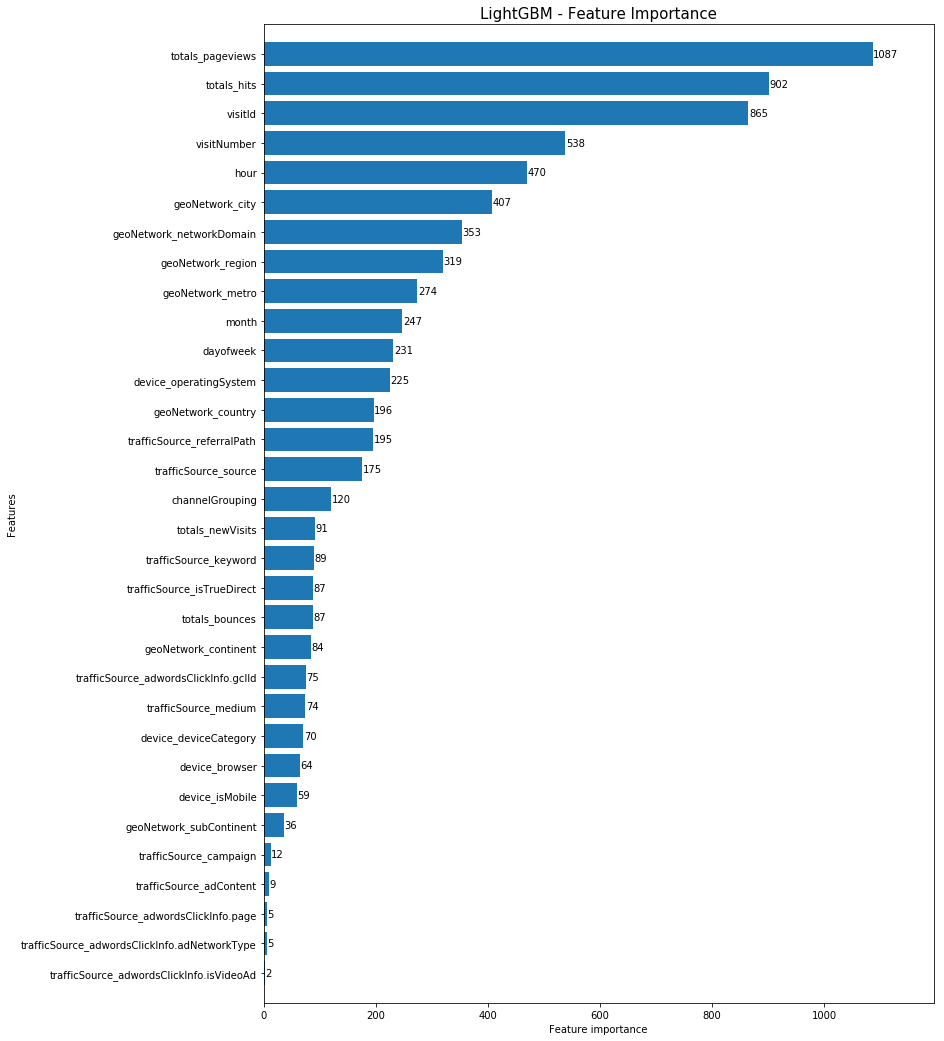

In [53]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()


In [55]:
# LGB FOR PERMUTATION TEST
def run_lgb_perm(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

In [56]:
base_rmse = 1.60683
iter = 100
p_val = []

#for column_perm in ["totals_pageviews", "totals_hits", "visitID", "totals_newVisits", "geoNetwork_continent", "trafficSource_campaign"]:
for column_perm in ["totals_pageviews", "totals_hits", "trafficSource_campaign"]:
    ans = []
    for i in range(iter):
        print(column_perm," ",i)
        train_permute = train_df.copy()
        train_permute[column_perm] = np.random.permutation(train_permute[column_perm])
        x, y = train_df.shape
        x1 = 3 * int(x / 4)

        dev_df = train_permute[0:x1]
        val_df = train_permute[x1:x]

        dev_X = dev_df
        val_X = val_df

        dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
        val_y = np.log1p(val_X["totals_transactionRevenue"].values)

        dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
        val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

        model, pred_val = run_lgb_perm(dev_X, dev_y, val_X, val_y)
        
        from sklearn import metrics
        pred_val[pred_val<0] = 0
        val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
        val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
        val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
        val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
        print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        ans.append(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
    
    less_sum = sum(i <= base_rmse for i in ans)
    p_val.append(less_sum/iter)

totals_pageviews   0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67808
[200]	valid_0's rmse: 1.6777
Early stopping, best iteration is:
[151]	valid_0's rmse: 1.67647
1.6989862887281182
totals_pageviews   1
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67818
[200]	valid_0's rmse: 1.67617
[300]	valid_0's rmse: 1.67705
Early stopping, best iteration is:
[238]	valid_0's rmse: 1.67599
1.6974820694022061
totals_pageviews   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67927
[200]	valid_0's rmse: 1.6778
Early stopping, best iteration is:
[170]	valid_0's rmse: 1.67775
1.7007559549528832
totals_pageviews   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67913
[200]	valid_0's rmse: 1.67794
Early stopping, best iteration is:
[152]	valid_0's rmse: 1.67738
1.7004178736941358
totals_pageviews   4
Training until validation scores don't 

1.6998201173170622
totals_pageviews   34
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.679
[200]	valid_0's rmse: 1.67737
Early stopping, best iteration is:
[171]	valid_0's rmse: 1.67708
1.6996221100484386
totals_pageviews   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67667
[200]	valid_0's rmse: 1.67454
[300]	valid_0's rmse: 1.67531
Early stopping, best iteration is:
[224]	valid_0's rmse: 1.67432
1.6975258704711442
totals_pageviews   36
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67694
[200]	valid_0's rmse: 1.67498
[300]	valid_0's rmse: 1.67695
Early stopping, best iteration is:
[200]	valid_0's rmse: 1.67498
1.696957319452543
totals_pageviews   37
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67843
[200]	valid_0's rmse: 1.67658
[300]	valid_0's rmse: 1.67625
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.676

1.6998628321270401
totals_pageviews   68
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67732
[200]	valid_0's rmse: 1.67698
Early stopping, best iteration is:
[158]	valid_0's rmse: 1.67632
1.6992110700824234
totals_pageviews   69
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67782
[200]	valid_0's rmse: 1.67554
[300]	valid_0's rmse: 1.6751
Early stopping, best iteration is:
[236]	valid_0's rmse: 1.67508
1.6970726368587985
totals_pageviews   70
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67871
[200]	valid_0's rmse: 1.67677
Early stopping, best iteration is:
[199]	valid_0's rmse: 1.67676
1.698447762799126
totals_pageviews   71
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67796
[200]	valid_0's rmse: 1.67666
Early stopping, best iteration is:
[151]	valid_0's rmse: 1.67615
1.698343580187142
totals_pageviews   72
Training until v

Early stopping, best iteration is:
[229]	valid_0's rmse: 1.63824
1.6583894076283499
totals_hits   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64181
[200]	valid_0's rmse: 1.642
Early stopping, best iteration is:
[120]	valid_0's rmse: 1.64081
1.6619544998694948
totals_hits   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64021
[200]	valid_0's rmse: 1.63921
Early stopping, best iteration is:
[194]	valid_0's rmse: 1.63915
1.66034614145215
totals_hits   4
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64043
[200]	valid_0's rmse: 1.63886
[300]	valid_0's rmse: 1.63889
Early stopping, best iteration is:
[283]	valid_0's rmse: 1.63839
1.6587602718406786
totals_hits   5
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64097
[200]	valid_0's rmse: 1.63938
[300]	valid_0's rmse: 1.63932
Early stopping, best iteration is:
[248]	valid_0's r

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64023
[200]	valid_0's rmse: 1.63872
Early stopping, best iteration is:
[173]	valid_0's rmse: 1.6384
1.6594895913454202
totals_hits   37
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.6404
[200]	valid_0's rmse: 1.6399
Early stopping, best iteration is:
[181]	valid_0's rmse: 1.63928
1.659802987855421
totals_hits   38
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64049
[200]	valid_0's rmse: 1.63846
Early stopping, best iteration is:
[168]	valid_0's rmse: 1.63828
1.6594732849109828
totals_hits   39
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64013
[200]	valid_0's rmse: 1.63841
Early stopping, best iteration is:
[171]	valid_0's rmse: 1.63826
1.6599870296766979
totals_hits   40
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.63966
[200]	valid_0's

[100]	valid_0's rmse: 1.64124
[200]	valid_0's rmse: 1.64004
Early stopping, best iteration is:
[160]	valid_0's rmse: 1.6397
1.6615424091117235
totals_hits   71
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64037
[200]	valid_0's rmse: 1.63853
[300]	valid_0's rmse: 1.63957
Early stopping, best iteration is:
[226]	valid_0's rmse: 1.63843
1.6587229801975962
totals_hits   72
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.63957
[200]	valid_0's rmse: 1.6384
[300]	valid_0's rmse: 1.64003
Early stopping, best iteration is:
[244]	valid_0's rmse: 1.63817
1.658847750576032
totals_hits   73
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64101
[200]	valid_0's rmse: 1.63983
Early stopping, best iteration is:
[169]	valid_0's rmse: 1.63932
1.6606231918339396
totals_hits   74
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64169
[200]	valid_0's r

[100]	valid_0's rmse: 1.61515
[200]	valid_0's rmse: 1.61012
[300]	valid_0's rmse: 1.60716
[400]	valid_0's rmse: 1.60898
Early stopping, best iteration is:
[317]	valid_0's rmse: 1.60681
1.6285539549971366
trafficSource_campaign   5
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61619
[200]	valid_0's rmse: 1.60844
[300]	valid_0's rmse: 1.60679
[400]	valid_0's rmse: 1.60796
Early stopping, best iteration is:
[309]	valid_0's rmse: 1.60643
1.627686596037699
trafficSource_campaign   6
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61624
[200]	valid_0's rmse: 1.60797
[300]	valid_0's rmse: 1.60697
Early stopping, best iteration is:
[235]	valid_0's rmse: 1.60662
1.6288032877124292
trafficSource_campaign   7
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61568
[200]	valid_0's rmse: 1.60842
[300]	valid_0's rmse: 1.60657
Early stopping, best iteration is:
[263]	valid_0's rmse: 1.

Early stopping, best iteration is:
[286]	valid_0's rmse: 1.607
1.6290369982658852
trafficSource_campaign   34
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61386
[200]	valid_0's rmse: 1.60614
[300]	valid_0's rmse: 1.60516
Early stopping, best iteration is:
[291]	valid_0's rmse: 1.60489
1.626082354558382
trafficSource_campaign   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61519
[200]	valid_0's rmse: 1.60854
[300]	valid_0's rmse: 1.6073
[400]	valid_0's rmse: 1.60799
Early stopping, best iteration is:
[320]	valid_0's rmse: 1.60689
1.6284941647154951
trafficSource_campaign   36
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61446
[200]	valid_0's rmse: 1.60754
[300]	valid_0's rmse: 1.60646
Early stopping, best iteration is:
[274]	valid_0's rmse: 1.60601
1.6271342192759097
trafficSource_campaign   37
Training until validation scores don't improve for 100 rounds.
[100

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61538
[200]	valid_0's rmse: 1.6086
[300]	valid_0's rmse: 1.60722
[400]	valid_0's rmse: 1.60839
Early stopping, best iteration is:
[336]	valid_0's rmse: 1.60682
1.6280588165489098
trafficSource_campaign   64
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61354
[200]	valid_0's rmse: 1.60787
[300]	valid_0's rmse: 1.60605
Early stopping, best iteration is:
[271]	valid_0's rmse: 1.60578
1.6277844566995392
trafficSource_campaign   65
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61453
[200]	valid_0's rmse: 1.60785
[300]	valid_0's rmse: 1.60596
[400]	valid_0's rmse: 1.60663
Early stopping, best iteration is:
[319]	valid_0's rmse: 1.60562
1.6272692393383523
trafficSource_campaign   66
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61542
[200]	valid_0's rmse: 1.6078
[300]	valid_0's rmse: 1.

[200]	valid_0's rmse: 1.60795
[300]	valid_0's rmse: 1.60595
[400]	valid_0's rmse: 1.60752
Early stopping, best iteration is:
[308]	valid_0's rmse: 1.60576
1.6275483439994345
trafficSource_campaign   93
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61638
[200]	valid_0's rmse: 1.60803
[300]	valid_0's rmse: 1.60715
Early stopping, best iteration is:
[262]	valid_0's rmse: 1.60668
1.628646219295886
trafficSource_campaign   94
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61484
[200]	valid_0's rmse: 1.60779
[300]	valid_0's rmse: 1.60572
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.60568
1.6278451102597529
trafficSource_campaign   95
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61438
[200]	valid_0's rmse: 1.60828
[300]	valid_0's rmse: 1.6076
Early stopping, best iteration is:
[247]	valid_0's rmse: 1.60747
1.6292056176642296
trafficSource_campaign   96
Train

In [60]:
print (p_val)

[0.0, 0.79]


In [58]:
base_rmse = 1.6288250113593938
iter = 100
p_val = []

#for column_perm in ["totals_pageviews", "totals_hits", "visitID", "totals_newVisits", "geoNetwork_continent", "trafficSource_campaign"]:
for column_perm in ["totals_pageviews", "trafficSource_campaign"]:
    ans = []
    for i in range(iter):
        print(column_perm," ",i)
        train_permute = train_df.copy()
        train_permute[column_perm] = np.random.permutation(train_permute[column_perm])
        x, y = train_df.shape
        x1 = 3 * int(x / 4)

        dev_df = train_permute[0:x1]
        val_df = train_permute[x1:x]

        dev_X = dev_df
        val_X = val_df

        dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
        val_y = np.log1p(val_X["totals_transactionRevenue"].values)

        dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
        val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

        model, pred_val = run_lgb_perm(dev_X, dev_y, val_X, val_y)
        
        from sklearn import metrics
        pred_val[pred_val<0] = 0
        val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
        val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
        val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
        val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
        print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        ans.append(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
    
    less_sum = sum(i <= base_rmse for i in ans)
    p_val.append(less_sum/iter)

totals_pageviews   0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67677
[200]	valid_0's rmse: 1.67553
Early stopping, best iteration is:
[197]	valid_0's rmse: 1.67535
1.6961747323386536
totals_pageviews   1
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67883
[200]	valid_0's rmse: 1.6776
Early stopping, best iteration is:
[166]	valid_0's rmse: 1.67747
1.6998017951878899
totals_pageviews   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67885
[200]	valid_0's rmse: 1.67673
Early stopping, best iteration is:
[198]	valid_0's rmse: 1.67672
1.6985315755889436
totals_pageviews   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67829
[200]	valid_0's rmse: 1.67675
Early stopping, best iteration is:
[174]	valid_0's rmse: 1.67649
1.6989213615713228
totals_pageviews   4
Training until validation scores don't improve for 100 rounds.
[100]

[100]	valid_0's rmse: 1.67927
[200]	valid_0's rmse: 1.67683
Early stopping, best iteration is:
[195]	valid_0's rmse: 1.67665
1.6988151381823573
totals_pageviews   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.6801
[200]	valid_0's rmse: 1.67767
[300]	valid_0's rmse: 1.67751
Early stopping, best iteration is:
[246]	valid_0's rmse: 1.67693
1.6987315980975761
totals_pageviews   36
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67857
[200]	valid_0's rmse: 1.67779
Early stopping, best iteration is:
[167]	valid_0's rmse: 1.67767
1.6999808889825225
totals_pageviews   37
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.6773
[200]	valid_0's rmse: 1.6752
[300]	valid_0's rmse: 1.67542
Early stopping, best iteration is:
[224]	valid_0's rmse: 1.67456
1.6962458174068968
totals_pageviews   38
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.678

[100]	valid_0's rmse: 1.67736
[200]	valid_0's rmse: 1.67628
Early stopping, best iteration is:
[186]	valid_0's rmse: 1.67611
1.6991524686056005
totals_pageviews   69
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67776
[200]	valid_0's rmse: 1.67652
[300]	valid_0's rmse: 1.67654
Early stopping, best iteration is:
[249]	valid_0's rmse: 1.67625
1.6981056259908012
totals_pageviews   70
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67925
[200]	valid_0's rmse: 1.67737
[300]	valid_0's rmse: 1.67832
Early stopping, best iteration is:
[213]	valid_0's rmse: 1.67705
1.6986511497928274
totals_pageviews   71
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.67839
[200]	valid_0's rmse: 1.67586
[300]	valid_0's rmse: 1.67555
[400]	valid_0's rmse: 1.67615
Early stopping, best iteration is:
[345]	valid_0's rmse: 1.67519
1.6961861907613274
totals_pageviews   72
Training until validation s

[300]	valid_0's rmse: 1.60516
[400]	valid_0's rmse: 1.60698
Early stopping, best iteration is:
[303]	valid_0's rmse: 1.60513
1.6278725154806037
trafficSource_campaign   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61554
[200]	valid_0's rmse: 1.60759
[300]	valid_0's rmse: 1.60519
Early stopping, best iteration is:
[299]	valid_0's rmse: 1.60519
1.6268587048494498
trafficSource_campaign   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61414
[200]	valid_0's rmse: 1.60652
[300]	valid_0's rmse: 1.60527
[400]	valid_0's rmse: 1.60565
[500]	valid_0's rmse: 1.60705
Early stopping, best iteration is:
[429]	valid_0's rmse: 1.605
1.6260716946173193
trafficSource_campaign   4
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61446
[200]	valid_0's rmse: 1.60759
[300]	valid_0's rmse: 1.60557
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.60547
1.6277123866391197
traffi

1.6268866860164783
trafficSource_campaign   31
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61585
[200]	valid_0's rmse: 1.60855
[300]	valid_0's rmse: 1.60774
[400]	valid_0's rmse: 1.60882
Early stopping, best iteration is:
[314]	valid_0's rmse: 1.60736
1.629845423275689
trafficSource_campaign   32
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61592
[200]	valid_0's rmse: 1.60725
[300]	valid_0's rmse: 1.60518
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.60515
1.6273277569257727
trafficSource_campaign   33
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61575
[200]	valid_0's rmse: 1.60852
[300]	valid_0's rmse: 1.60588
[400]	valid_0's rmse: 1.60595
Early stopping, best iteration is:
[395]	valid_0's rmse: 1.60574
1.6270775900148058
trafficSource_campaign   34
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61413
[200]	

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61476
[200]	valid_0's rmse: 1.60737
[300]	valid_0's rmse: 1.60553
[400]	valid_0's rmse: 1.60665
Early stopping, best iteration is:
[306]	valid_0's rmse: 1.60544
1.6274190865307192
trafficSource_campaign   61
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61409
[200]	valid_0's rmse: 1.6065
[300]	valid_0's rmse: 1.60475
[400]	valid_0's rmse: 1.60607
Early stopping, best iteration is:
[316]	valid_0's rmse: 1.60463
1.6271109913562427
trafficSource_campaign   62
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61574
[200]	valid_0's rmse: 1.60831
[300]	valid_0's rmse: 1.60677
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.60673
1.6287841640612817
trafficSource_campaign   63
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61437
[200]	valid_0's rmse: 1.60637
[300]	valid_0's rmse: 1

1.6262491021925685
trafficSource_campaign   90
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61483
[200]	valid_0's rmse: 1.6073
[300]	valid_0's rmse: 1.60645
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.60636
1.6283123182205175
trafficSource_campaign   91
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61627
[200]	valid_0's rmse: 1.60782
[300]	valid_0's rmse: 1.60675
Early stopping, best iteration is:
[287]	valid_0's rmse: 1.60647
1.6281784541509126
trafficSource_campaign   92
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61552
[200]	valid_0's rmse: 1.60769
[300]	valid_0's rmse: 1.60622
[400]	valid_0's rmse: 1.60659
Early stopping, best iteration is:
[306]	valid_0's rmse: 1.60604
1.628044699638732
trafficSource_campaign   93
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61511
[200]	valid_0's rmse: 1.60845
[300]	v

In [63]:
print ("pval for totals_pageviews and trafficSource_campaign")
pval1 = p_val
print (pval1)

pval for totals_pageviews and trafficSource_campaign
[0.0, 0.79]


In [64]:
base_rmse = 1.6288250113593938
iter = 100
p_val = []

for column_perm in ["totals_hits", "visitID", "totals_newVisits", "geoNetwork_continent", "trafficSource_adwordsClickInfo.isVideoAd"]:
#for column_perm in ["totals_pageviews", "trafficSource_campaign"]:
    ans = []
    for i in range(iter):
        print(column_perm," ",i)
        train_permute = train_df.copy()
        train_permute[column_perm] = np.random.permutation(train_permute[column_perm])
        x, y = train_df.shape
        x1 = 3 * int(x / 4)

        dev_df = train_permute[0:x1]
        val_df = train_permute[x1:x]

        dev_X = dev_df
        val_X = val_df

        dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
        val_y = np.log1p(val_X["totals_transactionRevenue"].values)

        dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
        val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

        model, pred_val = run_lgb_perm(dev_X, dev_y, val_X, val_y)
        
        from sklearn import metrics
        pred_val[pred_val<0] = 0
        val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
        val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
        val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
        val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
        print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        ans.append(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
    
    less_sum = sum(i <= base_rmse for i in ans)
    p_val.append(less_sum/iter)

totals_hits   0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.63955
[200]	valid_0's rmse: 1.63827
[300]	valid_0's rmse: 1.63873
Early stopping, best iteration is:
[246]	valid_0's rmse: 1.63782
1.6581963765435563
totals_hits   1
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.63971
[200]	valid_0's rmse: 1.63812
Early stopping, best iteration is:
[185]	valid_0's rmse: 1.63784
1.6586896120522647
totals_hits   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.63965
[200]	valid_0's rmse: 1.63883
Early stopping, best iteration is:
[160]	valid_0's rmse: 1.63819
1.6596700273645464
totals_hits   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64063
[200]	valid_0's rmse: 1.63872
[300]	valid_0's rmse: 1.63904
Early stopping, best iteration is:
[202]	valid_0's rmse: 1.63852
1.6590737782825022
totals_hits   4
Training until validation scores

[300]	valid_0's rmse: 1.64034
Early stopping, best iteration is:
[225]	valid_0's rmse: 1.63971
1.6595498226896224
totals_hits   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64001
[200]	valid_0's rmse: 1.6392
[300]	valid_0's rmse: 1.63858
Early stopping, best iteration is:
[295]	valid_0's rmse: 1.63838
1.6589235798860622
totals_hits   36
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64075
[200]	valid_0's rmse: 1.63846
Early stopping, best iteration is:
[193]	valid_0's rmse: 1.63823
1.6580189159622674
totals_hits   37
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64048
[200]	valid_0's rmse: 1.63849
[300]	valid_0's rmse: 1.63945
Early stopping, best iteration is:
[212]	valid_0's rmse: 1.6382
1.659406496934629
totals_hits   38
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64102
[200]	valid_0's rmse: 1.63908
Early stopping, b

[100]	valid_0's rmse: 1.64029
[200]	valid_0's rmse: 1.63846
Early stopping, best iteration is:
[195]	valid_0's rmse: 1.6384
1.658924880834794
totals_hits   70
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64081
[200]	valid_0's rmse: 1.6385
[300]	valid_0's rmse: 1.63944
Early stopping, best iteration is:
[224]	valid_0's rmse: 1.6384
1.6589547022353002
totals_hits   71
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64021
[200]	valid_0's rmse: 1.63806
[300]	valid_0's rmse: 1.63913
Early stopping, best iteration is:
[207]	valid_0's rmse: 1.63799
1.6586696287786469
totals_hits   72
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.64028
[200]	valid_0's rmse: 1.63889
[300]	valid_0's rmse: 1.63975
Early stopping, best iteration is:
[207]	valid_0's rmse: 1.63863
1.6592684656687935
totals_hits   73
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rm

KeyError: 'visitID'

In [65]:
print ("pval for totals_hits")
pval2 = p_val
print (pval2)

pval for totals_hits
[0.0]


In [66]:
base_rmse = 1.6288250113593938
iter = 100
p_val = []

for column_perm in ["visitId", "totals_newVisits", "geoNetwork_continent", "trafficSource_adwordsClickInfo.isVideoAd"]:
#for column_perm in ["totals_pageviews", "trafficSource_campaign"]:
    ans = []
    for i in range(iter):
        print(column_perm," ",i)
        train_permute = train_df.copy()
        train_permute[column_perm] = np.random.permutation(train_permute[column_perm])
        x, y = train_df.shape
        x1 = 3 * int(x / 4)

        dev_df = train_permute[0:x1]
        val_df = train_permute[x1:x]

        dev_X = dev_df
        val_X = val_df

        dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
        val_y = np.log1p(val_X["totals_transactionRevenue"].values)

        dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
        val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

        model, pred_val = run_lgb_perm(dev_X, dev_y, val_X, val_y)
        
        from sklearn import metrics
        pred_val[pred_val<0] = 0
        val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
        val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
        val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
        val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
        print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        ans.append(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
    
    less_sum = sum(i <= base_rmse for i in ans)
    p_val.append(less_sum/iter)

visitId   0
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61874
[200]	valid_0's rmse: 1.61186
[300]	valid_0's rmse: 1.61079
[400]	valid_0's rmse: 1.61236
Early stopping, best iteration is:
[301]	valid_0's rmse: 1.61077
1.6318902324996944
visitId   1
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61864
[200]	valid_0's rmse: 1.61235
[300]	valid_0's rmse: 1.61163
Early stopping, best iteration is:
[257]	valid_0's rmse: 1.61134
1.6329603860924704
visitId   2
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61831
[200]	valid_0's rmse: 1.61137
[300]	valid_0's rmse: 1.61071
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.61052
1.632458383551135
visitId   3
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61824
[200]	valid_0's rmse: 1.6138
[300]	valid_0's rmse: 1.61188
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.6

1.6323870397161369
visitId   32
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61903
[200]	valid_0's rmse: 1.61353
[300]	valid_0's rmse: 1.61276
Early stopping, best iteration is:
[273]	valid_0's rmse: 1.61257
1.633772432562727
visitId   33
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61722
[200]	valid_0's rmse: 1.61117
[300]	valid_0's rmse: 1.60977
Early stopping, best iteration is:
[264]	valid_0's rmse: 1.60911
1.6309293008684291
visitId   34
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61794
[200]	valid_0's rmse: 1.61042
[300]	valid_0's rmse: 1.60871
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.60863
1.629324400747333
visitId   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61945
[200]	valid_0's rmse: 1.61256
[300]	valid_0's rmse: 1.61033
[400]	valid_0's rmse: 1.61198
Early stopping, best iteration is:
[3

1.630442688812988
visitId   64
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61877
[200]	valid_0's rmse: 1.61124
[300]	valid_0's rmse: 1.6093
[400]	valid_0's rmse: 1.60991
Early stopping, best iteration is:
[361]	valid_0's rmse: 1.60892
1.6311351223674024
visitId   65
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61939
[200]	valid_0's rmse: 1.61356
[300]	valid_0's rmse: 1.61292
Early stopping, best iteration is:
[247]	valid_0's rmse: 1.61266
1.6347809585325694
visitId   66
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61813
[200]	valid_0's rmse: 1.61284
[300]	valid_0's rmse: 1.61097
Early stopping, best iteration is:
[285]	valid_0's rmse: 1.61085
1.6322319333635513
visitId   67
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61706
[200]	valid_0's rmse: 1.61126
[300]	valid_0's rmse: 1.60949
[400]	valid_0's rmse: 1.61004
Early s

[100]	valid_0's rmse: 1.61959
[200]	valid_0's rmse: 1.61203
[300]	valid_0's rmse: 1.61121
[400]	valid_0's rmse: 1.613
Early stopping, best iteration is:
[316]	valid_0's rmse: 1.61091
1.633337320698713
visitId   96
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.62023
[200]	valid_0's rmse: 1.61294
[300]	valid_0's rmse: 1.61234
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.61228
1.6339594085897122
visitId   97
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61865
[200]	valid_0's rmse: 1.61119
[300]	valid_0's rmse: 1.61147
Early stopping, best iteration is:
[229]	valid_0's rmse: 1.61088
1.6331451820179088
visitId   98
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61771
[200]	valid_0's rmse: 1.612
[300]	valid_0's rmse: 1.61178
Early stopping, best iteration is:
[268]	valid_0's rmse: 1.61132
1.6330723001212948
visitId   99
Training until validation scores don't

[100]	valid_0's rmse: 1.61435
[200]	valid_0's rmse: 1.60689
[300]	valid_0's rmse: 1.60554
[400]	valid_0's rmse: 1.60636
Early stopping, best iteration is:
[317]	valid_0's rmse: 1.60528
1.6276734805963624
totals_newVisits   26
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61625
[200]	valid_0's rmse: 1.60835
[300]	valid_0's rmse: 1.60722
Early stopping, best iteration is:
[291]	valid_0's rmse: 1.60685
1.629065404851213
totals_newVisits   27
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61341
[200]	valid_0's rmse: 1.60656
[300]	valid_0's rmse: 1.60582
[400]	valid_0's rmse: 1.60699
Early stopping, best iteration is:
[316]	valid_0's rmse: 1.60548
1.627479827903906
totals_newVisits   28
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61518
[200]	valid_0's rmse: 1.60884
[300]	valid_0's rmse: 1.60721
[400]	valid_0's rmse: 1.6081
Early stopping, best iteration is:
[303]	valid

[200]	valid_0's rmse: 1.60686
[300]	valid_0's rmse: 1.60516
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.6051
1.628033139552096
totals_newVisits   56
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61495
[200]	valid_0's rmse: 1.60686
[300]	valid_0's rmse: 1.60558
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.60532
1.6269768167152543
totals_newVisits   57
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61468
[200]	valid_0's rmse: 1.60597
[300]	valid_0's rmse: 1.60507
[400]	valid_0's rmse: 1.60654
Early stopping, best iteration is:
[303]	valid_0's rmse: 1.60499
1.6275628120695633
totals_newVisits   58
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61402
[200]	valid_0's rmse: 1.60752
[300]	valid_0's rmse: 1.60711
[400]	valid_0's rmse: 1.60694
Early stopping, best iteration is:
[377]	valid_0's rmse: 1.60672
1.6285849483981747
totals_newVisits   59

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61467
[200]	valid_0's rmse: 1.60855
[300]	valid_0's rmse: 1.60689
[400]	valid_0's rmse: 1.60624
[500]	valid_0's rmse: 1.60891
Early stopping, best iteration is:
[410]	valid_0's rmse: 1.60618
1.627611957572389
totals_newVisits   86
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61488
[200]	valid_0's rmse: 1.6073
[300]	valid_0's rmse: 1.60513
Early stopping, best iteration is:
[298]	valid_0's rmse: 1.60511
1.6272716762822643
totals_newVisits   87
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61373
[200]	valid_0's rmse: 1.60735
[300]	valid_0's rmse: 1.60607
Early stopping, best iteration is:
[291]	valid_0's rmse: 1.60592
1.6278972732921246
totals_newVisits   88
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61524
[200]	valid_0's rmse: 1.60764
[300]	valid_0's rmse: 1.60582
[400]	valid_

[100]	valid_0's rmse: 1.6157
[200]	valid_0's rmse: 1.60745
[300]	valid_0's rmse: 1.60728
Early stopping, best iteration is:
[285]	valid_0's rmse: 1.607
1.6288590228428401
geoNetwork_continent   16
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61525
[200]	valid_0's rmse: 1.60862
[300]	valid_0's rmse: 1.60704
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.60695
1.62834628453936
geoNetwork_continent   17
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61636
[200]	valid_0's rmse: 1.60965
[300]	valid_0's rmse: 1.60748
[400]	valid_0's rmse: 1.60852
Early stopping, best iteration is:
[320]	valid_0's rmse: 1.60699
1.6283713459784788
geoNetwork_continent   18
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61579
[200]	valid_0's rmse: 1.61034
[300]	valid_0's rmse: 1.60914
[400]	valid_0's rmse: 1.60929
Early stopping, best iteration is:
[371]	valid_0's rmse: 1.60844
1

Early stopping, best iteration is:
[291]	valid_0's rmse: 1.60589
1.627581131451362
geoNetwork_continent   46
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.6161
[200]	valid_0's rmse: 1.60967
[300]	valid_0's rmse: 1.60857
Early stopping, best iteration is:
[289]	valid_0's rmse: 1.60818
1.6290085179252192
geoNetwork_continent   47
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61529
[200]	valid_0's rmse: 1.6087
[300]	valid_0's rmse: 1.60804
Early stopping, best iteration is:
[296]	valid_0's rmse: 1.60781
1.6292247507237816
geoNetwork_continent   48
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61639
[200]	valid_0's rmse: 1.60959
[300]	valid_0's rmse: 1.60897
[400]	valid_0's rmse: 1.60963
Early stopping, best iteration is:
[304]	valid_0's rmse: 1.60874
1.6300652724694003
geoNetwork_continent   49
Training until validation scores don't improve for 100 rounds.
[100]	valid

1.6277413073393714
geoNetwork_continent   76
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61488
[200]	valid_0's rmse: 1.60934
[300]	valid_0's rmse: 1.6091
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.60881
1.6303868222357092
geoNetwork_continent   77
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61469
[200]	valid_0's rmse: 1.60854
[300]	valid_0's rmse: 1.60785
Early stopping, best iteration is:
[292]	valid_0's rmse: 1.60781
1.6292727881731077
geoNetwork_continent   78
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61586
[200]	valid_0's rmse: 1.60885
[300]	valid_0's rmse: 1.60753
Early stopping, best iteration is:
[290]	valid_0's rmse: 1.60704
1.6288518575443285
geoNetwork_continent   79
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61724
[200]	valid_0's rmse: 1.61008
[300]	valid_0's rmse: 1.60939
Early stopping

[100]	valid_0's rmse: 1.61486
[200]	valid_0's rmse: 1.60856
[300]	valid_0's rmse: 1.60662
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.60648
1.6287457736877775
trafficSource_adwordsClickInfo.isVideoAd   6
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61469
[200]	valid_0's rmse: 1.60796
[300]	valid_0's rmse: 1.6053
[400]	valid_0's rmse: 1.60724
Early stopping, best iteration is:
[316]	valid_0's rmse: 1.60485
1.627200623269411
trafficSource_adwordsClickInfo.isVideoAd   7
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61595
[200]	valid_0's rmse: 1.60813
[300]	valid_0's rmse: 1.60594
Early stopping, best iteration is:
[282]	valid_0's rmse: 1.60577
1.6272761633885604
trafficSource_adwordsClickInfo.isVideoAd   8
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61581
[200]	valid_0's rmse: 1.60902
[300]	valid_0's rmse: 1.60691
[400]	valid_0's rmse: 1.60814
Early 

[100]	valid_0's rmse: 1.61533
[200]	valid_0's rmse: 1.60635
[300]	valid_0's rmse: 1.60603
[400]	valid_0's rmse: 1.60632
Early stopping, best iteration is:
[382]	valid_0's rmse: 1.60582
1.6275511969909888
trafficSource_adwordsClickInfo.isVideoAd   34
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61527
[200]	valid_0's rmse: 1.60805
[300]	valid_0's rmse: 1.606
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.60598
1.6272015539083482
trafficSource_adwordsClickInfo.isVideoAd   35
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61582
[200]	valid_0's rmse: 1.60881
[300]	valid_0's rmse: 1.60743
[400]	valid_0's rmse: 1.60814
Early stopping, best iteration is:
[309]	valid_0's rmse: 1.60672
1.6279354973220455
trafficSource_adwordsClickInfo.isVideoAd   36
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61546
[200]	valid_0's rmse: 1.60759
[300]	valid_0's rmse: 1.60573
Ear

1.6262856454966457
trafficSource_adwordsClickInfo.isVideoAd   61
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61392
[200]	valid_0's rmse: 1.60604
[300]	valid_0's rmse: 1.60485
Early stopping, best iteration is:
[235]	valid_0's rmse: 1.60453
1.626279583316436
trafficSource_adwordsClickInfo.isVideoAd   62
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61533
[200]	valid_0's rmse: 1.60796
[300]	valid_0's rmse: 1.60671
[400]	valid_0's rmse: 1.60655
Early stopping, best iteration is:
[304]	valid_0's rmse: 1.60645
1.6285676539207288
trafficSource_adwordsClickInfo.isVideoAd   63
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.6148
[200]	valid_0's rmse: 1.60798
[300]	valid_0's rmse: 1.60675
Early stopping, best iteration is:
[268]	valid_0's rmse: 1.60652
1.6283300575790873
trafficSource_adwordsClickInfo.isVideoAd   64
Training until validation scores don't improve for 100 rou

[100]	valid_0's rmse: 1.61609
[200]	valid_0's rmse: 1.60768
[300]	valid_0's rmse: 1.60634
[400]	valid_0's rmse: 1.60823
Early stopping, best iteration is:
[301]	valid_0's rmse: 1.60634
1.627610010562457
trafficSource_adwordsClickInfo.isVideoAd   89
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61572
[200]	valid_0's rmse: 1.60851
[300]	valid_0's rmse: 1.60785
[400]	valid_0's rmse: 1.60843
Early stopping, best iteration is:
[332]	valid_0's rmse: 1.60742
1.6287218484469923
trafficSource_adwordsClickInfo.isVideoAd   90
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61445
[200]	valid_0's rmse: 1.60645
[300]	valid_0's rmse: 1.60459
Early stopping, best iteration is:
[297]	valid_0's rmse: 1.6045
1.6267508228900307
trafficSource_adwordsClickInfo.isVideoAd   91
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.61449
[200]	valid_0's rmse: 1.60845
[300]	valid_0's rmse: 1.60621
Ear

In [67]:
print ("pval for visitId, totals_newVisits, geoNetwork_continent, trafficSource_adwordsClickInfo.isVideoAd")
pval3 = p_val
print (pval3)

pval for visitId, totals_newVisits, geoNetwork_continent, trafficSource_adwordsClickInfo.isVideoAd
[0.0, 0.76, 0.48, 0.85]


In [ ]:
tmp_sum = sum(i <= 1.60683 for i in ans)
print (tmp_sum)

In [ ]:
ans

In [ ]:
#IGNORE
for column_perm in ["totals_pageviews", "totals_hits", "visitNumber", "geoNetwork_country", "totals_pageviews"]:
    for i in range(20):
        print(column_perm," ",i)
        train_permute = train_df.copy()
        train_permute[column_perm] = np.random.permutation(train_permute[column_perm])
        x, y = train_df.shape
        x1 = 3 * int(x / 4)

        dev_df = train_permute[0:x1]
        val_df = train_permute[x1:x]

        dev_X = dev_df
        val_X = val_df

        dev_y = np.log1p(dev_X["totals_transactionRevenue"].values)
        val_y = np.log1p(val_X["totals_transactionRevenue"].values)

        dev_X = dev_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)
        val_X = val_X.drop(['totals_transactionRevenue'] + ['date'] + ['fullVisitorId'] + ['visitStartTime'], axis=1)

        model, pred_val = run_lgb_perm(dev_X, dev_y, val_X, val_y)
        
        #new_test1.csv
        from sklearn import metrics
        pred_val[pred_val<0] = 0
        val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
        val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
        val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
        #print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
        print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
        

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn import neighbors, datasets

import pylab as pl

from sklearn.decomposition import PCA
pca = PCA(n_components=15)
pca.fit(dev_X)
dev_X_reduced = pca.transform(X)
print("Reduced dataset shape:", dev_X_reduced.shape)

pca.fit(val_X)
val_X_reduced = pca.transform(X)
print("Reduced dataset shape:", val_X_reduced.shape)

pca.fit(test_X)
test_X_reduced = pca.transform(X)
print("Reduced dataset shape:", test_X_reduced.shape)


dev_X = dev_X.iloc[:, ]

cols = ['']

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(dev_X, label=dev_y)
dtest = xgb.DMatrix(val_X)

#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.1
         }
num_rounds = 100

xb = xgb.train(params, dtrain, num_rounds)

y_pred_xgb = xb.predict(dtest)

In [ ]:
rmse = np.sqrt(mean_squared_error(val_y, y_pred_xgb))
print("RMSE: %f" % (rmse))

print("Mean squared error: %.2f"
      % mean_squared_error(val_y, y_pred_xgb))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(val_y, y_pred_xgb))

In [ ]:
from sklearn import metrics
y_pred_xgb[y_pred_xgb<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals_transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(y_pred_xgb)
#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))


In [ ]:
dtest_actual = xgb.DMatrix(test_X)
actual_testdata_pred_xgb_params = xb.predict(dtest_actual)

sub_df = pd.DataFrame({"fullVisitorId":test_id})
actual_testdata_pred_xgb_params[actual_testdata_pred_xgb_params<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(actual_testdata_pred_xgb_params)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("new_test1_xgb.csv", index=False)


In [ ]:
dtest_actual = xgb.DMatrix(test_X)
actual_testdata_pred_xgb_params = xb.predict(dtest_actual)

#EXPORTING PREDICTIONS TO CSV

# key = pd.DataFrame(test[test.columns[0:1]])

# key['fare_amount'] = actual_testdata_pred_xgb_params
# key.to_csv('test_predictions_xgb_params.csv')